In [1]:
! git clone https://github.com/Rares00/Oracle_ChatBot

Cloning into 'Oracle_ChatBot'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 184 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (184/184), 25.45 MiB | 23.48 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [8]:
cd /content/Oracle_ChatBot

/content/Oracle_ChatBot


       YEAR  MO  DY  HR   T2M    RH2M  PRECTOTCORR      PS  WS50M
0      2018   1   1   0  6.20   92.69         0.06   98.67  13.98
1      2018   1   1   1  5.65   90.69         0.01   98.90  14.07
2      2018   1   1   2  4.95   92.25         0.04   99.03  12.05
3      2018   1   1   3  4.70   94.31         0.18   99.06  11.05
4      2018   1   1   4  4.79   94.62         0.14   99.00  10.74
...     ...  ..  ..  ..   ...     ...          ...     ...    ...
43843  2023   1   1  19  7.11   98.69         0.05  100.00   5.96
43844  2023   1   1  20  6.44  100.00         0.02  100.01   5.09
43845  2023   1   1  21  5.96  100.00         0.02   99.98   4.83
43846  2023   1   1  22  5.84  100.00         0.02   99.97   4.80
43847  2023   1   1  23  5.93  100.00         0.02   99.98   4.87

[43848 rows x 9 columns]
                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2018-01-01 00:00:00         6.20     92.

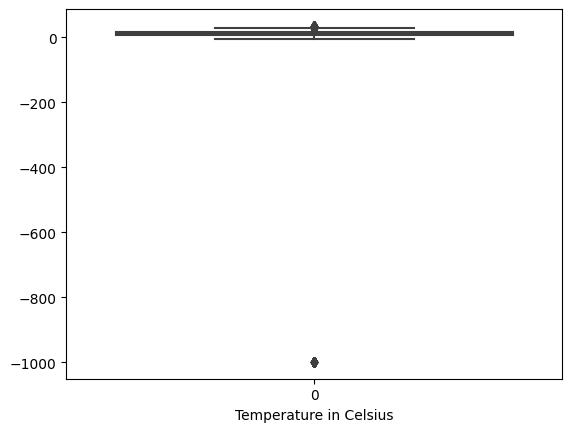

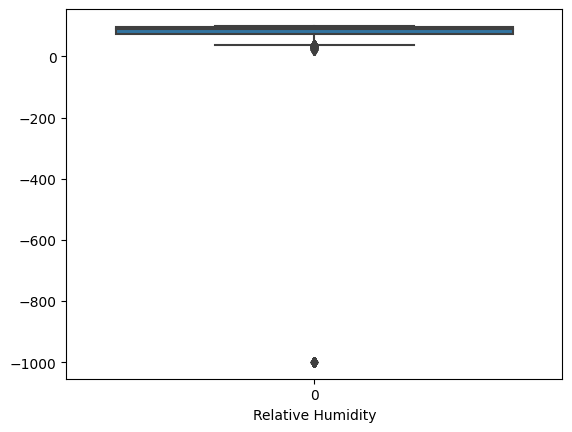

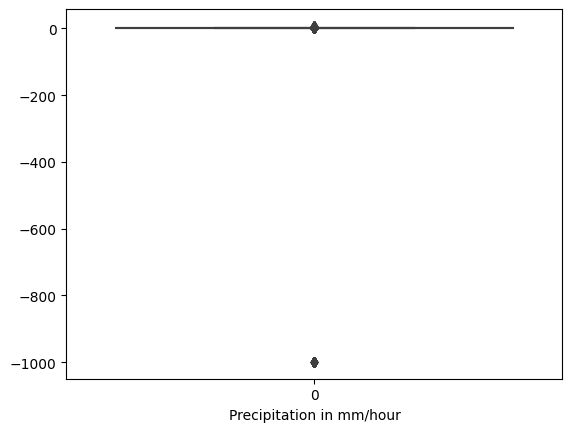

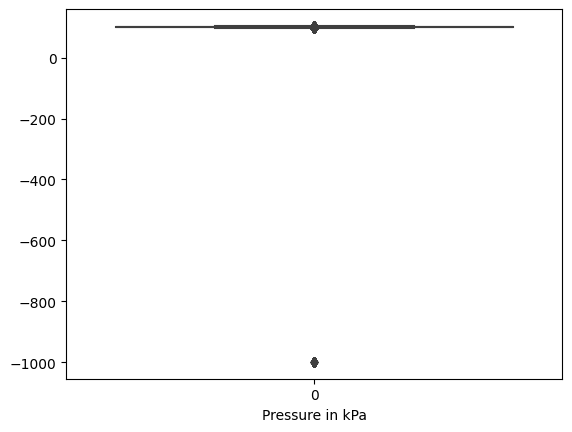

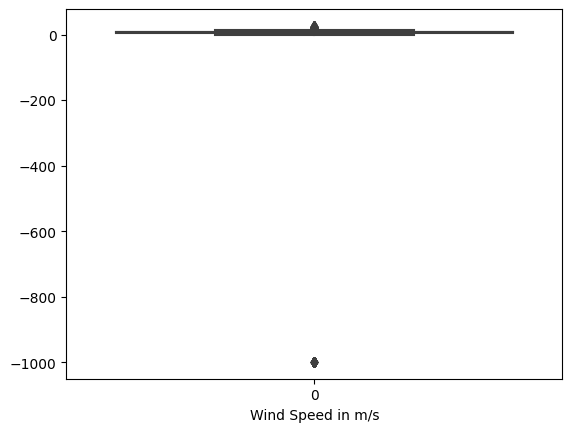

Temperature      72
Humidity         72
Precipitation    72
Pressure         72
Wind Speed       72
dtype: int64
                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2022-11-18 00:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 01:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 02:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 03:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 04:00:00       -999.0    -999.0         -999.0    -999.0   
...                          ...       ...            ...       ...   
2022-11-20 19:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 20:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 21:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 22:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 23:00:00       -999.0   

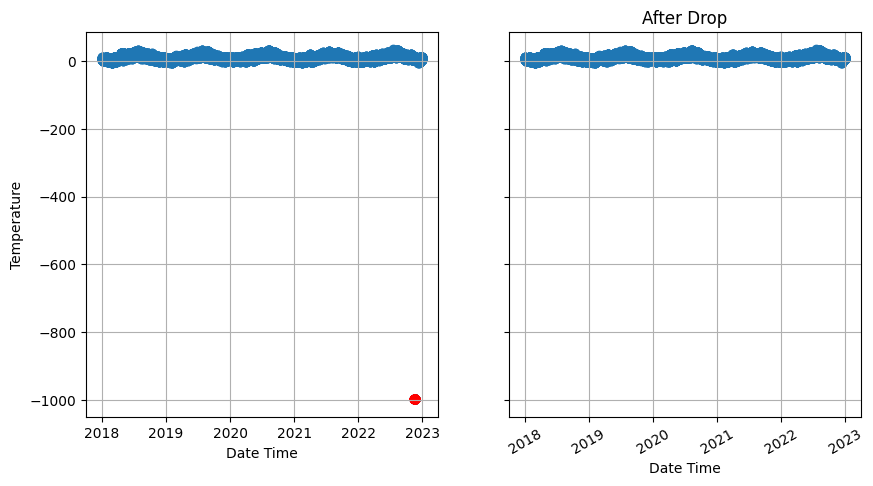

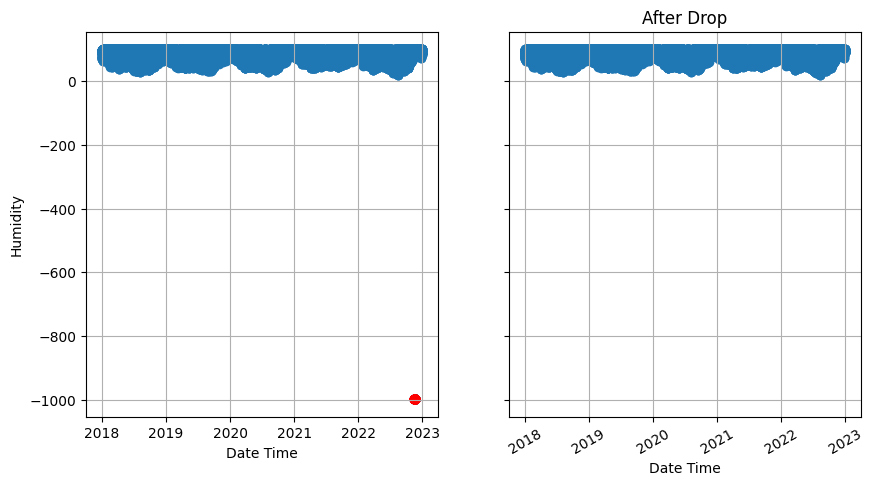

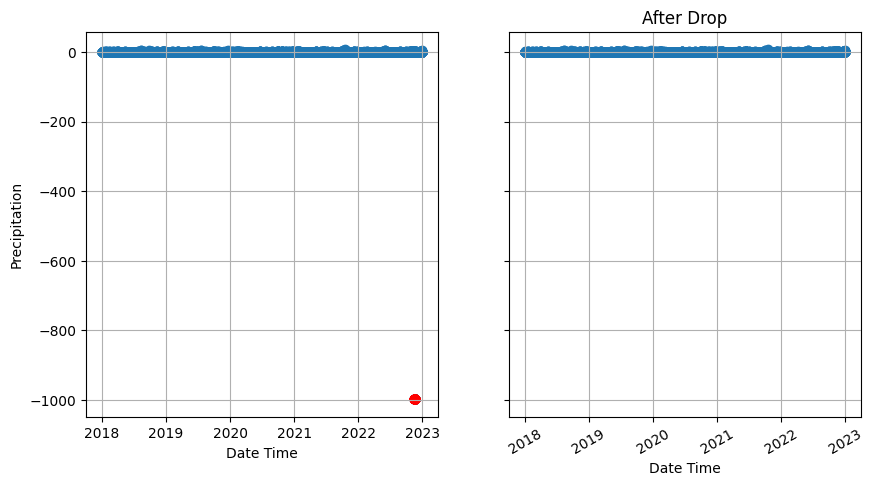

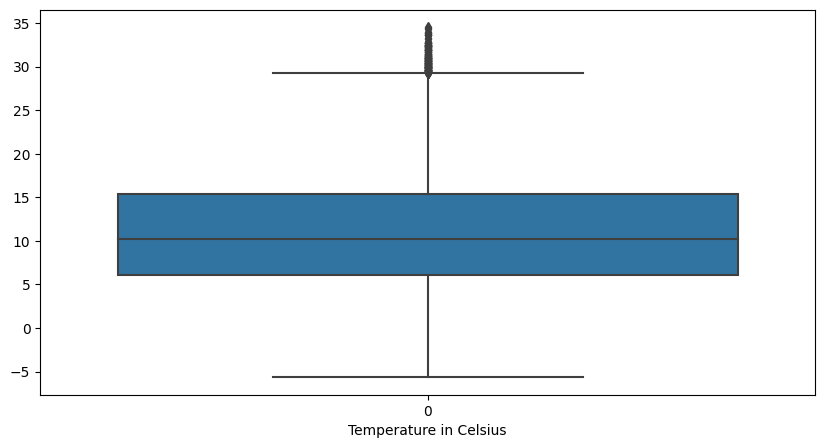

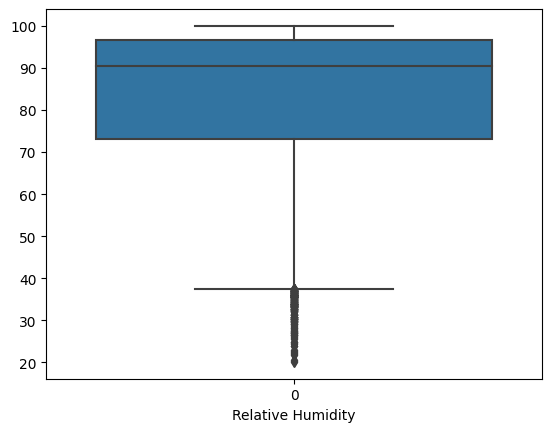

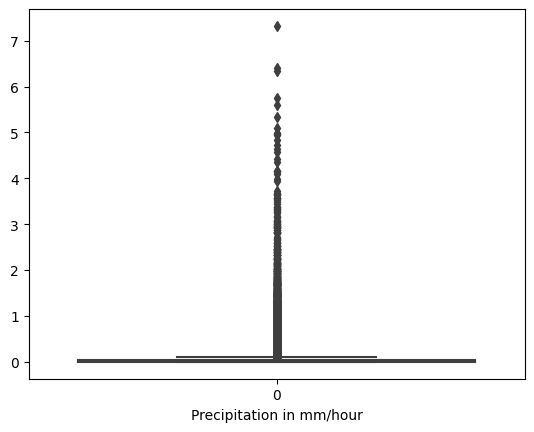

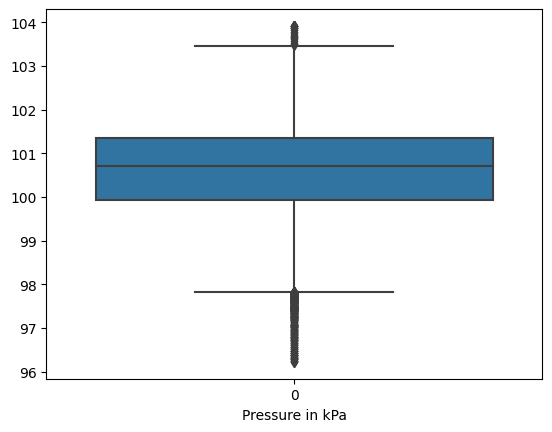

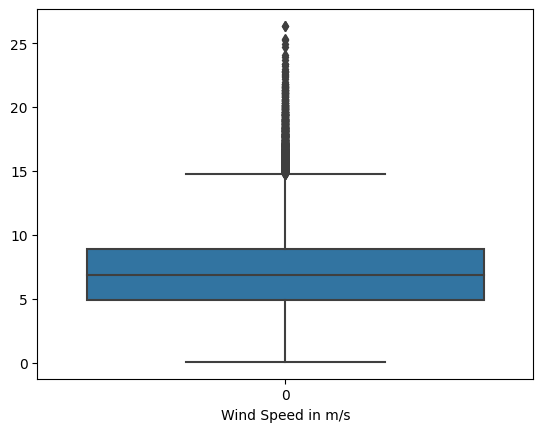

                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2021-10-20 21:00:00        12.01     98.31           7.32     97.88   
2021-10-05 03:00:00        12.98     94.06           6.40     98.78   
2022-06-05 04:00:00        11.05     95.88           6.33    100.49   
2022-06-05 03:00:00        11.07     95.44           5.76    100.55   
2021-10-20 20:00:00        11.94     98.38           5.60     98.08   
2021-10-05 02:00:00        12.88     93.31           5.34     98.98   
2018-08-10 12:00:00        17.43     68.38           5.09    100.76   
2022-12-31 12:00:00        12.50     94.00           4.99     99.08   
2021-10-20 02:00:00        15.62     95.00           4.97     99.45   
2021-10-20 22:00:00        11.68     97.81           4.96     97.80   
2019-07-20 02:00:00        16.60     96.50           4.94     99.78   
2019-07-20 01:00:00        16.72     96.25           4.83     99.80   
2018-0

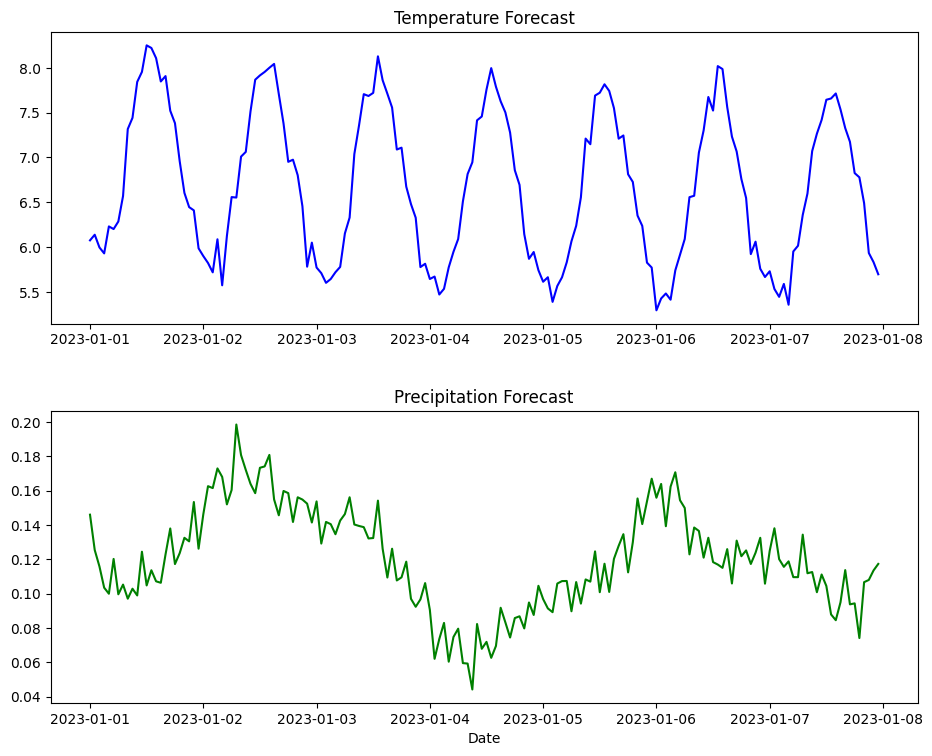

In [14]:
import main as m

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import torch
from torch import nn, optim

In [16]:
df = m.filter_data

In [17]:
df.describe()

,Temperature,Humidity,Precipitation,Pressure,Wind Speed
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000
mean,10.853933,83.548213,0.083914,100.601628,7.164083
std,6.556767,16.724444,0.276963,1.086920,3.302154
min,-5.650000,20.120000,0.000000,96.220000,0.060000
25%,6.120000,73.060000,0.000000,99.940000,4.920000
50%,10.270000,90.500000,0.010000,100.710000,6.880000
75%,15.370000,96.750000,0.040000,101.350000,8.870000
max,34.530000,100.000000,7.320000,103.920000,26.350000


In [18]:
df

,Temperature,Humidity,Precipitation,Pressure,Wind Speed
datetime,,,,,
2018-01-01 00:00:00,6.20,92.69,0.06,98.67,13.98
2018-01-01 01:00:00,5.65,90.69,0.01,98.90,14.07
2018-01-01 02:00:00,4.95,92.25,0.04,99.03,12.05
2018-01-01 03:00:00,4.70,94.31,0.18,99.06,11.05
2018-01-01 04:00:00,4.79,94.62,0.14,99.00,10.74
...,...,...,...,...,...
2022-12-31 20:00:00,11.39,93.38,0.04,99.19,14.51
2022-12-31 21:00:00,11.06,93.25,0.07,99.27,14.76
2022-12-31 22:00:00,10.80,92.56,0.07,99.32,14.59


### **Pytorch**

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def numpy_to_tvar(x, device):
  return torch.from_numpy(x).type(torch.FloatTensor).to(device)
    
def reshape_and_convert_to_tensors(X_train, X_test, y_train, device):
    # Reshape the data for CNN
    X_train = np.reshape(X_train, newshape=(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2]))
    X_test = np.reshape(X_test, newshape=(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2]))

    # Convert data to PyTorch tensors
    X_train = numpy_to_tvar(X_train, device)
    X_test = numpy_to_tvar(X_test, device)
    y_train = numpy_to_tvar(y_train, device)

    return X_train, X_test, y_train

### **Prepare data**

In [20]:
def sliding_window(data, window_size, forecast_horizon, feature_index=0):
    """
    Converts the input time series data into a set of input-output pairs using a sliding window.
    
    Args:
    - data: a numpy array containing the input time series data
    - window_size: an integer specifying the size of the sliding window
    - forecast_horizon: an integer specifying the forecast horizon
    - feature_index: an integer specifying which feature to include in the output array (default is 0 for temperature and 2 for precipitation)
    
    Returns:
    - a tuple (X, y) containing the input-output pairs
    """
    X, y = [], []
    for i in range(len(data) - window_size - forecast_horizon):
        X.append(data[i:i+window_size, :])
        y.append(data[i+window_size:i+window_size+forecast_horizon, feature_index])
    return np.array(X), np.array(y)

def split_data(df, n_splits):
    """
    Splits a DataFrame into training and testing sets using time series split.
    
    Args:
    - df: a pandas DataFrame containing the data to split
    - n_splits: an integer specifying the number of splits to create
    
    Returns:
    - two lists of DataFrames: the training sets and the testing sets
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    train_data_list = []
    test_data_list = []
    for train_index, test_index in tscv.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]
        train_data_list.append(train_data)
        test_data_list.append(test_data)
    return train_data_list, test_data_list

def prepare_data(train_data_list, test_data_list, window_size, forecast_horizon, feature_index=0):
    """
    Prepares the training and testing data by concatenating the train/test sets, scaling the data using MinMaxScaler,
    and creating the input-output pairs using sliding window.
    
    Args:
    - train_data_list: a list of pandas DataFrames containing the training sets from each split
    - test_data_list: a list of pandas DataFrames containing the testing sets from each split
    - window_size: an integer specifying the size of the sliding window
    - forecast_horizon: an integer specifying the forecast horizon
    - feature_index: an integer specifying which feature to include in the output array (default is 0 for temperature and 2 for precipitation)
    
    Returns:
    - a tuple (X_train, y_train, X_test, y_test) containing the input-output pairs for the training and testing sets
    """
    # concatenate the train data from all the folds
    train_data = pd.concat(train_data_list)
    # scale the train data using min-max scaler
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    # create the input-output pairs using sliding window
    X_train, y_train = sliding_window(scaled_train_data, window_size, forecast_horizon, feature_index=feature_index)

    # concatenate the test data from all the folds
    test_data = pd.concat(test_data_list)
    # scale the test data using min-max scaler
    scaled_test_data = scaler.transform(test_data)
    # create the input-output pairs using sliding window
    X_test, y_test = sliding_window(scaled_test_data, window_size, forecast_horizon, feature_index=feature_index)
    
    print(f'Train X shape: {X_train.shape}')
    print(f'Train y shape: {y_train.shape}')
    print(f'Test X shape: {X_test.shape}')
    print(f'Test y shape: {y_test.shape}')

    return X_train, y_train, X_test, y_test, scaler

In [21]:
# define the window size and forecast horizon
window_size = 24 * 7 * 2 # two weeks
forecast_horizon = 24 * 7 # one week

train_data_list, test_data_list = split_data(df, n_splits=5)

X_train_temp, y_train_temp, X_test_temp, y_test_temp, scaler = prepare_data(train_data_list, test_data_list, window_size=window_size, forecast_horizon=forecast_horizon, feature_index=0)
X_train_temp, X_test_temp, y_train_temp = reshape_and_convert_to_tensors(X_train_temp, X_test_temp, y_train_temp, device=device)

X_train_precip, y_train_precip, X_test_precip, y_test_precip, scaler = prepare_data(train_data_list, test_data_list, window_size=window_size, forecast_horizon=forecast_horizon, feature_index=2)
X_train_precip, X_test_precip, y_train_precip = reshape_and_convert_to_tensors(X_train_precip, X_test_precip, y_train_precip, device=device)

Train X shape: (109061, 336, 5)
Train y shape: (109061, 168)
Test X shape: (36016, 336, 5)
Test y shape: (36016, 168)
Train X shape: (109061, 336, 5)
Train y shape: (109061, 168)
Test X shape: (36016, 336, 5)
Test y shape: (36016, 168)


### **Define model**

In [22]:
# set seed for reproducibility
seed = 88
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# Define CNN model
class Alex(nn.Module):
  def __init__(self, output_size):
    super(Alex, self).__init__()
    self.output = output_size

    self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7,stride=1,padding=3),
                                nn.ReLU(True),)
    
    self.layer2 = nn.MaxPool2d(kernel_size=2)

    self.layer3 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7,stride=1,padding=3),
                                nn.ReLU(True),)
    
    self.layer4 = nn.MaxPool2d(kernel_size=2)

    self.layer5 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=7,stride=1,padding=3),
                                nn.ReLU(True),)
    
    self.layer6 = nn.Sequential(nn.Linear(128*84*1, 256),
                                nn.Linear(256,168))

  def forward(self, input):
    repre = self.layer1(input)
    repre = self.layer2(repre)
    repre = self.layer3(repre) 
    repre = self.layer4(repre)
    repre = self.layer5(repre)
    repre = self.layer6(repre.view(repre.size(0), -1))
    return repre

In [23]:
def train_model(model, optimizer, loss_func, X_train, y_train, X_test, y_test, batch_size=1024, num_epochs=1000, device=device):
    model.to(device)
    
    output_size = y_train.shape[1]
    train_losses = []
    test_losses = []
    batch = 0  # initialize batch variable outside the loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_train[batch:batch+batch_size, :, :, :])
        train_loss = loss_func(y_pred, y_train[batch:batch+batch_size])
        train_losses.append(train_loss.item())

        # backward pass and optimization
        train_loss.backward()
        optimizer.step()

        batch += batch_size  # update batch variable

        # check if all data is processed
        if batch >= len(X_train):
            batch = 0

        # compute the test loss every 20 epochs
        if (epoch+1) % 20 == 0:
            with torch.no_grad():
                batch_test = 0
                mse_test = []
                for kk in range(0, len(X_test), batch_size):
                    test_out = model(X_test[batch_test:batch_test+batch_size, :, :, :])
                    mse_test.append(mean_squared_error(test_out.cpu().detach().numpy(), y_test[batch_test:batch_test+batch_size]))

                mean_test_loss = np.mean(mse_test)
                test_losses.append(mean_test_loss)

                # print('test mse', mean_test_loss)
                
    return model, train_losses, test_losses

### **Training for temp (5m 56s)**

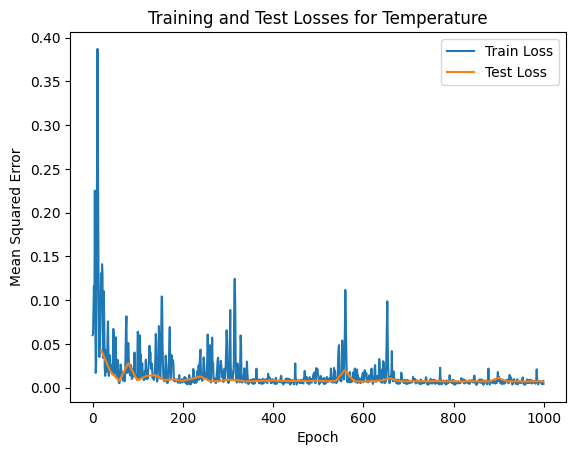

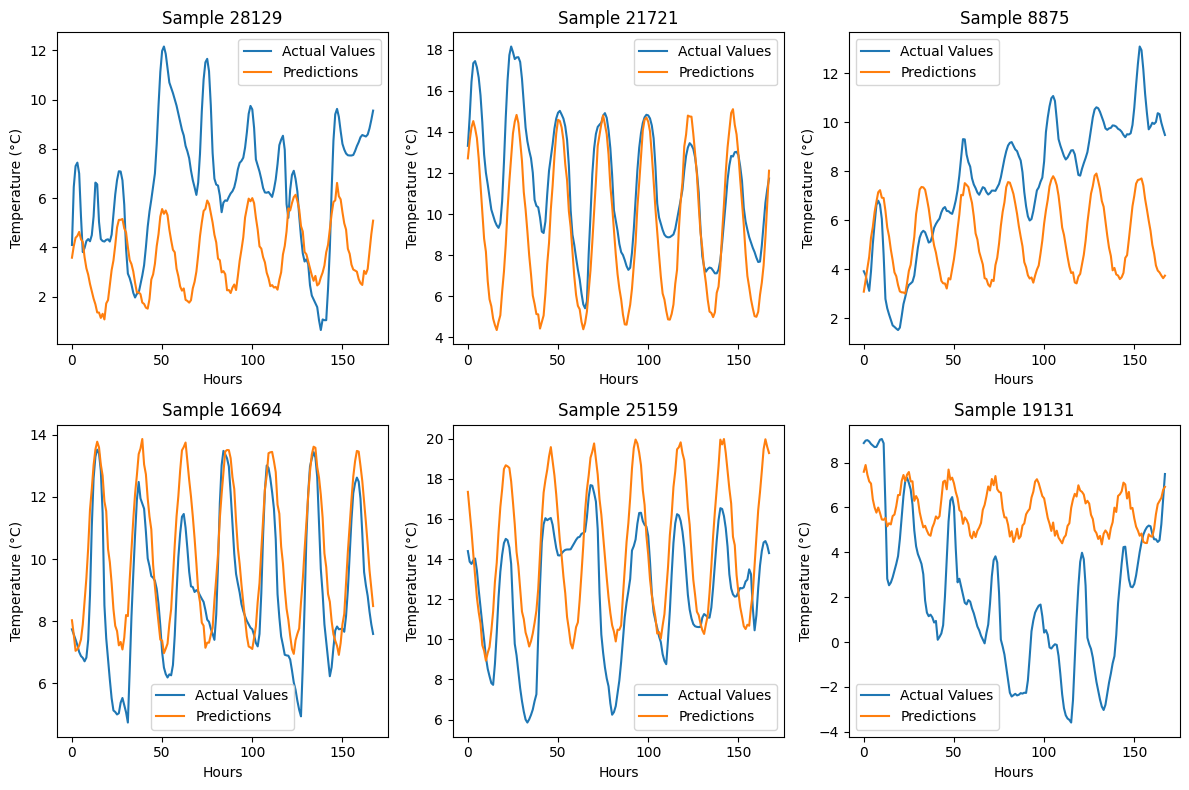

In [24]:
# define training parameters
output_size = 24 * 7 # predict 7 days of hourly data

# initialize the model, optimizer, and loss function
model = Alex(output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

# train the model
model_temp, train_losses, test_losses = train_model(model, optimizer, loss_func, X_train_temp, y_train_temp, X_test_temp, y_test_temp, batch_size=1024, num_epochs=1000, device=device)

# plot train and test losses
num_epochs = 1000
plt.plot(train_losses, label='Train Loss')
plt.plot(range(19, num_epochs, 20), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Losses for Temperature')
plt.legend()
plt.show()

train_data = pd.concat(train_data_list[:], axis=0)
y_train = train_data.iloc[:, 0].values  # temperature
scaler_temp = MinMaxScaler()
scaler_temp_train = scaler_temp.fit_transform(y_train.reshape(-1, 1))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
with torch.no_grad():
    num_samples = 6  # update num_samples to 6 for 2x3 subplot grid
    random_indices = np.random.choice(len(X_test_temp), size=num_samples, replace=False)
    samples = X_test_temp[random_indices]
    predictions = model(samples.to(device)).cpu().numpy()
    actual_values = y_test_temp[random_indices]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # create subplot grid

    for i in range(num_samples):
        # convert predictions and actual values back to original scale
        pred_unscaled = scaler_temp.inverse_transform(predictions[i].reshape(-1, 1)).flatten()
        actual_unscaled = scaler_temp.inverse_transform(actual_values[i].reshape(-1, 1)).flatten()

        # plot predictions and actual values in a subplot
        row = i // 3
        col = i % 3
        axes[row, col].plot(actual_unscaled, label='Actual Values')
        axes[row, col].plot(pred_unscaled, label='Predictions')
        axes[row, col].set_xlabel('Hours')
        axes[row, col].set_ylabel('Temperature (°C)')
        axes[row, col].set_title(f'Sample {random_indices[i]}')
        axes[row, col].legend()

    plt.tight_layout()  # adjust subplot layout
    plt.show()

### **Training for precip**

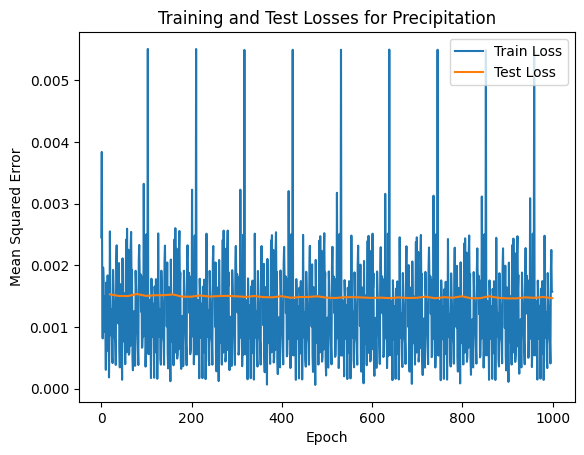

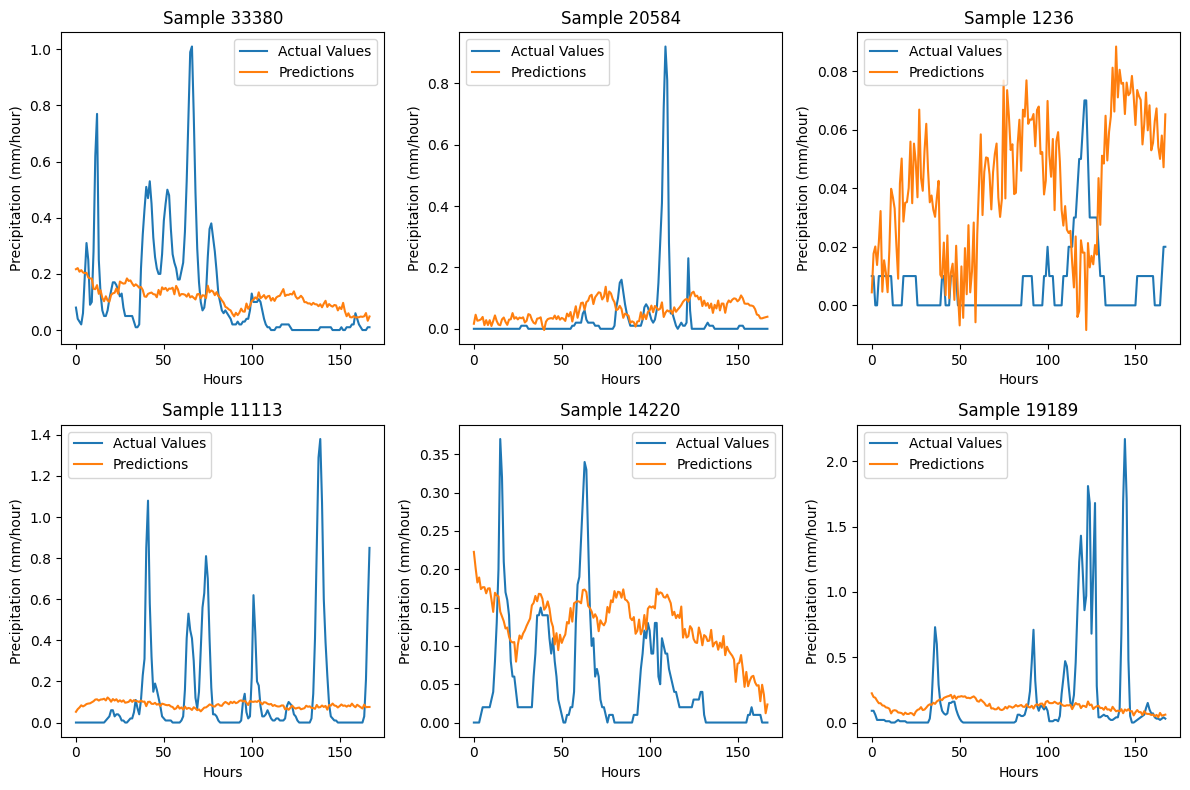

In [25]:
# define training parameters
output_size = 24 * 7 # predict 7 days of hourly data

# initialize the model, optimizer, and loss function
model = Alex(output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

# train the model
model_precip, train_losses, test_losses = train_model(model, optimizer, loss_func, X_train_precip, y_train_precip, X_test_precip, y_test_precip, batch_size=1024, num_epochs=1000, device=device)

# plot train and test losses
num_epochs = 1000
plt.plot(train_losses, label='Train Loss')
plt.plot(range(19, num_epochs, 20), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Losses for Precipitation')
plt.legend()
plt.show()

train_data = pd.concat(train_data_list[:], axis=0)
y_train = train_data.iloc[:, 2].values  # model_precip
scaler_precip = MinMaxScaler()
scaler_precip_train = scaler_precip.fit_transform(y_train.reshape(-1, 1))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
with torch.no_grad():
    num_samples = 6  # update num_samples to 6 for 2x3 subplot grid
    random_indices = np.random.choice(len(X_test_precip), size=num_samples, replace=False)
    samples = X_test_precip[random_indices]
    predictions = model(samples.to(device)).cpu().numpy()
    actual_values = y_test_precip[random_indices]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # create subplot grid

    for i in range(num_samples):
        # convert predictions and actual values back to original scale
        pred_unscaled = scaler_precip.inverse_transform(predictions[i].reshape(-1, 1)).flatten()
        actual_unscaled = scaler_precip.inverse_transform(actual_values[i].reshape(-1, 1)).flatten()

        # plot predictions and actual values in a subplot
        row = i // 3
        col = i % 3
        axes[row, col].plot(actual_unscaled, label='Actual Values')
        axes[row, col].plot(pred_unscaled, label='Predictions')
        axes[row, col].set_xlabel('Hours')
        axes[row, col].set_ylabel('Precipitation (mm/hour)')
        axes[row, col].set_title(f'Sample {random_indices[i]}')
        axes[row, col].legend()

    plt.tight_layout()  # adjust subplot layout
    plt.show()

In [26]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-ac3e68d9-9892-9ac5-dca7-662118d7ed71)


### **Save model results**

In [27]:
# save the trained model to a file
torch.save(model_temp.state_dict(), 'model_temp.pth')
torch.save(model_precip.state_dict(), 'model_precip.pth')

import pickle

# open a new file in binary write mode and save the scaler object
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('scaler_temp.pkl', 'wb') as f:
    pickle.dump(scaler_temp, f)
with open('scaler_precip.pkl', 'wb') as f:
    pickle.dump(scaler_precip, f)

### **Read files and input**

In [28]:
# load the scaler object from the file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('scaler_temp.pkl', 'rb') as f:
    scaler_temp = pickle.load(f)
with open('scaler_precip.pkl', 'rb') as f:
    scaler_precip = pickle.load(f)

In [29]:
# extract the last 336 data points from df
data = df.iloc[-337:-1, :]  # df = m.filter_data

# normalize the input data using the pre-trained scaler
scaled_data = scaler.transform(data)

# reshape the data to match the input shape of the model
input_data = scaled_data.reshape(1, 1, 336, 5)

# convert the input data to a PyTorch tensor and send it to the CPU
input_tensor = torch.Tensor(input_data).cpu()

### **Inference**

In [30]:
output_size = 24 * 7 # predict 7 days of hourly data
model = Alex(output_size)
# load the saved model from the file
model.load_state_dict(torch.load('model_temp.pth', map_location=torch.device('cpu')))

# make predictions using the loaded model and the input data
with torch.no_grad():
    predictions = model(input_tensor).cpu().numpy()

# convert the predictions back to the original scale
forecast_temp = scaler_temp.inverse_transform(predictions.reshape(-1, 1))

In [31]:
# load the saved model from the file
model.load_state_dict(torch.load('model_precip.pth', map_location=torch.device('cpu')))

# make predictions using the loaded model and the input data
with torch.no_grad():
    predictions = model(input_tensor).cpu().numpy()

# convert the predictions back to the original scale
forecast_precip = scaler_precip.inverse_transform(predictions.reshape(-1, 1))

### **Save inference results**

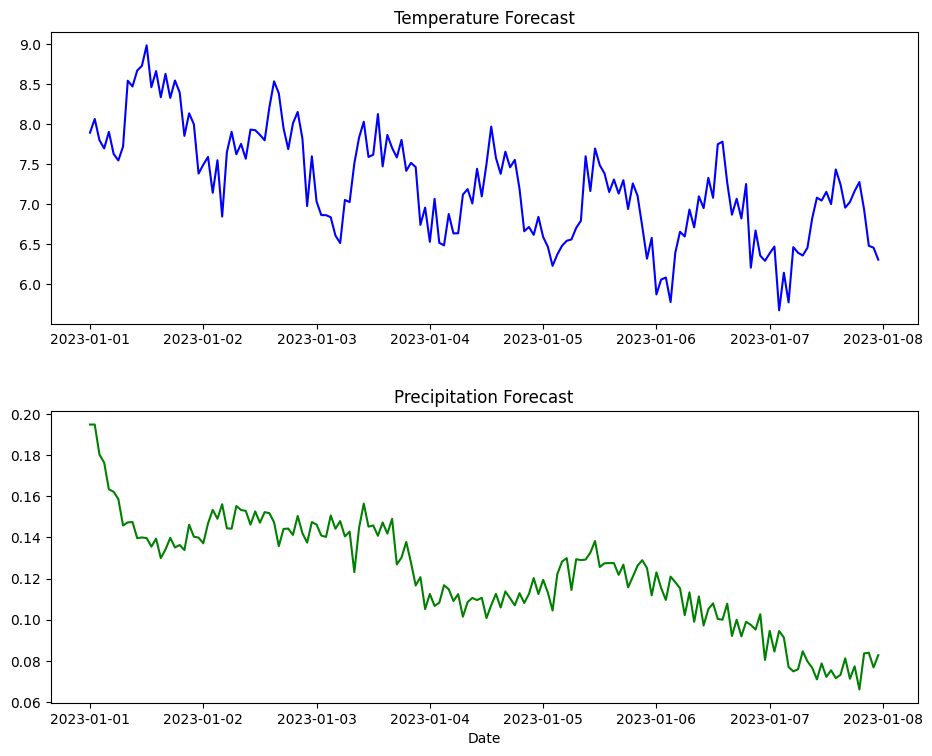

In [32]:
# create a datetime index starting from 2023-01-01 00:00:00 with hourly frequency
index = pd.date_range(start='2023-01-01 00:00:00', periods=168, freq='H')

# create a dataframe with the forecast values and the datetime index
df_forecast = pd.DataFrame({'Temperature': forecast_temp.flatten(), 'Precipitation': forecast_precip.flatten()}, index=index)
df_forecast['Precipitation'] = df_forecast['Precipitation'].clip(lower=0)

# plot the forecast values
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# plot forecast_temp in the first subplot
axs[0].plot(df_forecast.index, df_forecast['Temperature'], color='blue')
axs[0].set_title('Temperature Forecast')

# plot forecast_precip in the second subplot
axs[1].plot(df_forecast.index, df_forecast['Precipitation'], color='green')
axs[1].set_title('Precipitation Forecast')

# set shared x-axis label and adjust spacing between subplots
fig.tight_layout(pad=3.0)
plt.xlabel('Date')
plt.show()

In [33]:
df_forecast

,Temperature,Precipitation
2023-01-01 00:00:00,7.890933,0.194776
2023-01-01 01:00:00,8.062195,0.194790
2023-01-01 02:00:00,7.798575,0.180216
2023-01-01 03:00:00,7.694467,0.176263
2023-01-01 04:00:00,7.901899,0.163320
...,...,...
2023-01-07 19:00:00,7.275304,0.066109
2023-01-07 20:00:00,6.932532,0.083619
2023-01-07 21:00:00,6.479617,0.083953
2023-01-07 22:00:00,6.456367,0.076815


In [34]:
df_forecast.to_csv('df_forecast.csv')